In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn import datasets

In [52]:
n_pts = 500

centers = []
X , y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1 , factor=0.1)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [53]:
def scatter_plot():
    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])

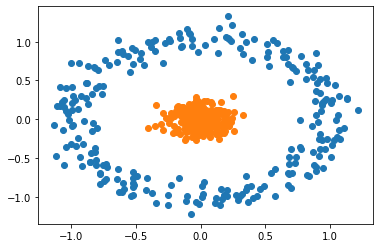

In [54]:
scatter_plot()

In [55]:
class Model(nn.Module):

    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):

        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):

        pred = self.forward(x)
        if pred >=0.5:
            return 1
        else:
            return 0

In [56]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [57]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [58]:
epochs = 1000
losses = []
for i in range(epochs):

    i+=1

    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    if i % 100 == 1:
        print(f"Epoch : {i:2}, Loss : {loss:.4f}")

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch :  1, Loss : 0.7149
Epoch : 101, Loss : 0.0658
Epoch : 201, Loss : 0.0131
Epoch : 301, Loss : 0.0069
Epoch : 401, Loss : 0.0045
Epoch : 501, Loss : 0.0032
Epoch : 601, Loss : 0.0024
Epoch : 701, Loss : 0.0019
Epoch : 801, Loss : 0.0015
Epoch : 901, Loss : 0.0013


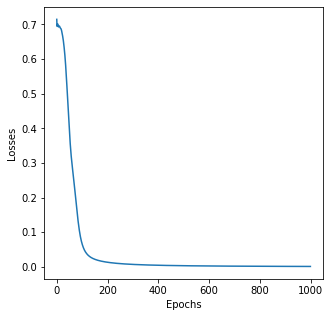

In [59]:
plt.figure(figsize = (5,5))
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.show()

In [109]:
def plot_decision_boundary(X, y):

    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    
    xx, yy = np.meshgrid(x_span, y_span)

    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel() ])

    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

    #print(x_span)
    #print(y_span)
    #print()
    #print(xx)
    #print(xx.shape)
    #print()
    #print(yy)
    #print(yy.shape)
    #print()
    #print(grid)
    #print()
    #print(z)

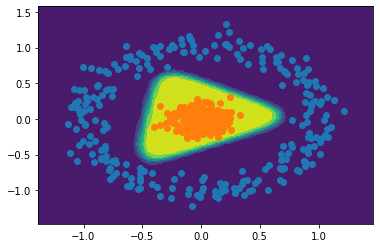

In [110]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is : 1


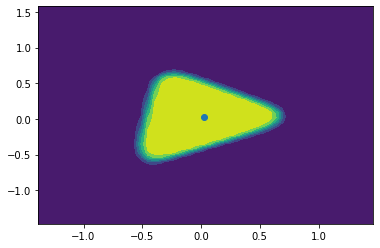

In [111]:
x = 0.025
y = 0.025

point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o")
print("Prediction is :", prediction)

plot_decision_boundary(X,y)